In [1]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import cluster

import pandas as pd
import numpy as np
import cv2

In [2]:
colors = [
    'blue',
    'red',
    'yellow',
    'magenta',
    'green',
    'orange',
    'cadetblue',
    'rosybrown',
    'lightcoral',
    'goldenrod',
    'turquoise',
    'darkslategray',
    'steelblue',
    'orchid',
    'olive'
]

In [3]:
image = cv2.imread('sample.jpeg', 0)
np.shape(image)

(116, 138)

In [4]:
X = np.expand_dims(image.flatten(), axis=1)
X = np.exp(-X / X.std())
X

array([[48.59222518],
       [44.73859977],
       [43.52321022],
       ...,
       [ 8.8095933 ],
       [ 8.11094506],
       [ 8.11094506]])

In [5]:
model = cluster.KMeans(n_clusters=5).fit(X)
print(np.unique(model.labels_, return_counts=True))

labels = model.labels_.reshape(image.shape)

(array([0, 1, 2, 3, 4]), array([7898, 2963, 1791, 1970, 1386], dtype=int64))


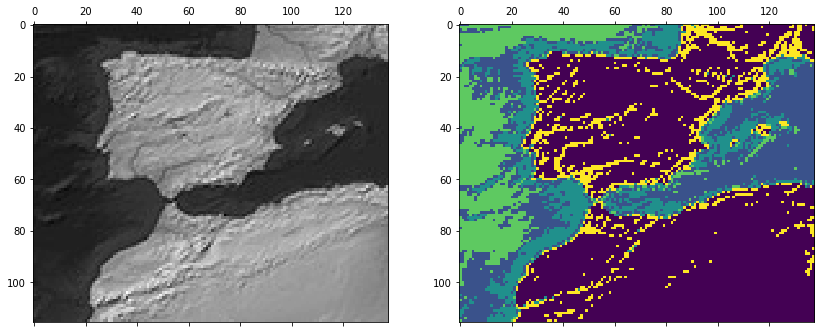

In [6]:
fig, (ax_image, ax_label) = plt.subplots(ncols=2, nrows=1, figsize=(14, 8))
ax_image.matshow(image, cmap='gray')
ax_label.matshow(labels)
plt.show()

In [7]:
image = cv2.imread('world.png')
image = image[:, :, ::-1]
dims = image.shape[:-1]
np.shape(image)

(718, 1440, 3)

In [8]:
df = pd.DataFrame()
df[['Red', 'Green', 'Blue']] = image.reshape(-1, 3)

In [9]:
# Rescale data (but in our issue, it has a negative effect!)

# for color in df.columns:
#     df[color[0]] = np.exp(-df[color] / df[color].std())
# df

,Red,Green,Blue,R,G,B
0,112,159,192,19.475526,33.314224,34.240185
1,122,173,210,15.846791,20.084856,12.674996
2,120,171,207,16.513948,21.590522,14.958196
3,120,171,207,16.513948,21.590522,14.958196
4,120,171,207,16.513948,21.590522,14.958196
...,...,...,...,...,...,...
1033915,241,244,248,1.362454,1.543002,1.555310
1033916,242,244,248,1.334649,1.543002,1.555310
1033917,242,244,248,1.334649,1.543002,1.555310
1033918,245,247,251,1.254592,1.384442,1.317910


In [10]:
n = 5  # number of clusters
cmap = ListedColormap(colors[:n])

model = cluster.KMeans(n_clusters=n).fit(df[['Red', 'Green', 'Blue']])
df['Cluster'] = model.labels_

print(np.unique(model.labels_, return_counts=True))

(array([0, 1, 2, 3, 4]), array([143494, 356528, 325006, 121544,  87348], dtype=int64))


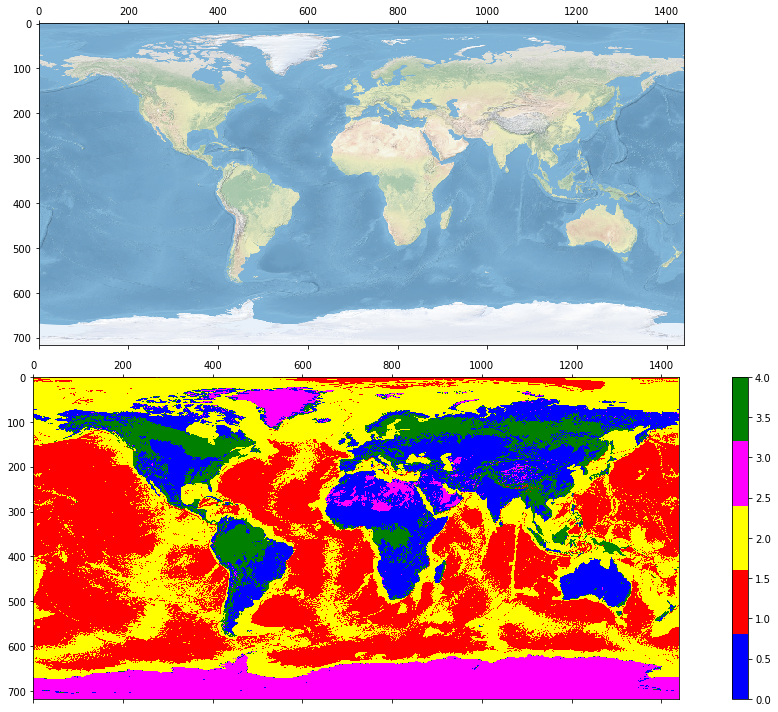

In [11]:
fig, (ax_image, ax_label) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10), tight_layout=True)

ax_image.matshow(image)

mat = ax_label.matshow(df['Cluster'].values.reshape(dims), cmap=cmap)
fig.colorbar(mappable=mat, ax=ax_label)

plt.show()

In [12]:
land = [0, 3, 4]
water = [1, 2]

ice = 3
forest = 4
deep = 1
shallow = 2

In [13]:
stats = df.groupby('Cluster').agg({'R': lambda x: x.count() / len(df)})['R'].rename('Denstiy')
stats

Cluster
0    0.138786
1    0.344831
2    0.314343
3    0.117556
4    0.084482
Name: Denstiy, dtype: float64

In [14]:
stats[water].sum()  # the density of water on Earth's surface

0.659174791086351

In [15]:
stats[deep].sum() / stats[water].sum()  # the density of deep water through all water

0.5231257721551675

In [16]:
stats[forest].sum() / stats[land].sum()  # the density of forest lands through all lands

0.2478759088045496

In [17]:
stats[ice].sum() / stats[land].sum()  # the density of ice lands through all lands

0.34491722145601705